In [ ]:
import pandas as pd
df = pd.read_csv('weatherHistory.csv')
print(df.shape)
df.head(5)

(96453, 12)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
## preprocessing
# Specifying nan values of each column
for col in df.columns:
    print(col,df[col].isnull().sum())

## Eliminate columns that not useful
df = df.drop(['Formatted Date'],axis=1)

Formatted Date 0
Summary 0
Precip Type 517
Temperature (C) 0
Apparent Temperature (C) 0
Humidity 0
Wind Speed (km/h) 0
Wind Bearing (degrees) 0
Visibility (km) 0
Loud Cover 0
Pressure (millibars) 0
Daily Summary 0


In [ ]:
# Handle missing values
# Filling nan values with mean of each column
df['Precip Type'].fillna(df['Precip Type'].mode()[0], inplace=True)
for col in df.columns:
    print(col, df[col].isnull().sum())

Summary 0
Precip Type 0
Temperature (C) 0
Apparent Temperature (C) 0
Humidity 0
Wind Speed (km/h) 0
Wind Bearing (degrees) 0
Visibility (km) 0
Loud Cover 0
Pressure (millibars) 0
Daily Summary 0


In [ ]:
# Encode categorical data
from sklearn.preprocessing import LabelEncoder

X = df.drop(['Apparent Temperature (C)'], axis=1)
y = df['Apparent Temperature (C)']

le = LabelEncoder()
X['Precip Type'] = le.fit_transform(df['Precip Type'])
X['Daily Summary'] = le.fit_transform(df['Daily Summary'])
X['Summary'] = le.fit_transform(df['Summary'])
X.head()


,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,19,0,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13,197
1,19,0,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63,197
2,17,0,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197
3,19,0,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41,197
4,17,0,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51,197


In [ ]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,0.730769,0.0,0.506975,0.89,0.221130,0.699164,0.983,0.0,0.970135,0.924883
1,0.730769,0.0,0.505085,0.86,0.223399,0.721448,0.983,0.0,0.970613,0.924883
2,0.653846,0.0,0.505445,0.89,0.061523,0.568245,0.929,0.0,0.970909,0.924883
3,0.730769,0.0,0.487805,0.83,0.220877,0.749304,0.983,0.0,0.971358,0.924883
4,0.653846,0.0,0.495365,0.83,0.172970,0.721448,0.983,0.0,0.971454,0.924883


In [ ]:
## Split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.3)
X_train.shape

(67517, 10)

In [ ]:
## Build ANN model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu',name = 'layer_1'))
model.add(Dense(16, activation='relu',name = 'layer_2'))
model.add(Dense(1, activation='linear',name = 'output_layer'))

model.summary()

Model: "sequential_51"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 32)                352       
                                                                 
 layer_2 (Dense)             (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 897 (3.50 KB)
Trainable params: 897 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)


history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=50, verbose=1,batch_size=256,callbacks=[earlystopping])

Epoch 1/50
264/264 [==============================] - 1s 2ms/step - loss: 8.6989 - mae: 8.6989 - val_loss: 5.4037 - val_mae: 5.4037
Epoch 2/50
264/264 [==============================] - 1s 2ms/step - loss: 3.9765 - mae: 3.9765 - val_loss: 2.5068 - val_mae: 2.5068
Epoch 3/50
264/264 [==============================] - 0s 2ms/step - loss: 1.7672 - mae: 1.7672 - val_loss: 1.2014 - val_mae: 1.2014
Epoch 4/50
264/264 [==============================] - 0s 2ms/step - loss: 0.9200 - mae: 0.9200 - val_loss: 0.7594 - val_mae: 0.7594
Epoch 5/50
264/264 [==============================] - 0s 2ms/step - loss: 0.6737 - mae: 0.6737 - val_loss: 0.5747 - val_mae: 0.5747
Epoch 6/50
264/264 [==============================] - 0s 2ms/step - loss: 0.5040 - mae: 0.5040 - val_loss: 0.4593 - val_mae: 0.4593
Epoch 7/50
264/264 [==============================] - 0s 2ms/step - loss: 0.4293 - mae: 0.4293 - val_loss: 0.4130 - val_mae: 0.4130
Epoch 8/50
264/264 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
## Try predicting new data
# print(X_test[:5])
pred = model.predict(X_test[:5])
print(pred)
print()
print(y_test[:5])

1/1 [==============================] - 0s 41ms/step
[[14.415085 ]
 [12.141248 ]
 [23.954456 ]
 [14.987357 ]
 [12.7753935]]

6119     14.422222
51443    12.155556
18754    23.961111
34070    15.000000
26082    12.800000
Name: Apparent Temperature (C), dtype: float64


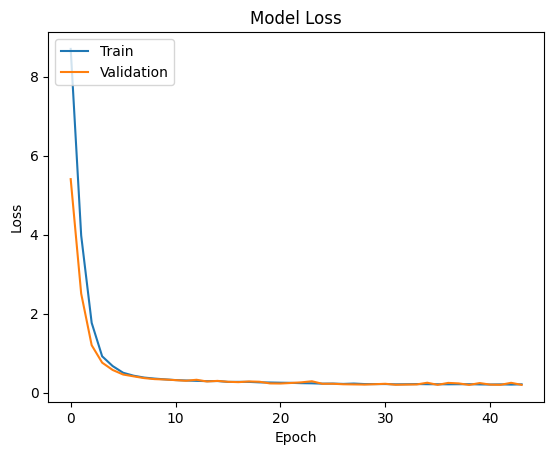

In [ ]:
## training visualzation
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Save model
